# 一、项目目标
- 加载CIFAR-100数据集，并进行可视化分析

- 训练一个CNN对100类图片进行分类

- 评估模型效果，并尝试改进模型表现

# 二、项目步骤
## step1：环境准备
使用python主要依赖Pytorch和torchvision

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## step2：数据加载与可视化
### 加载CIFAR-100数据集

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),#转化为张量
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))    # 归一化
])

# 训练集、测试集
trainset = torchvision.datasets.CIFAR100(root='./data',train=True,download=True,transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data',train=False,download=True,transform=transform)

# 数据集加载
trainloader = torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True)
testloader = torch.utils.data.DataLoader(testset,batch_size=32,shuffle=False)

# 获取类别名称
classes = trainset.classes
print(classes[:10])

Files already downloaded and verified
Files already downloaded and verified
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']


可视化一些CIFAR-100的图像

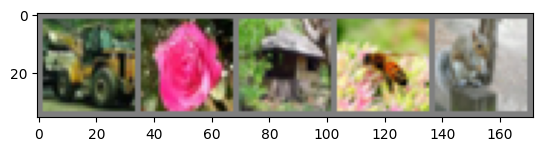

Labels: ['tractor', 'rose', 'house', 'bee', 'squirrel']


In [8]:
def imshow(img):
    img = img / 2 + 0.5  # 反归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0))) # 调整维度数据，并显示图像
    plt.show()  # 显示图像
    
dataiter = iter(trianloader)
images,labels = next(dataiter)

# 显示前5张
imshow(torchvision.utils.make_grid(images[:5]))
print('Labels:',[classes[labels[j]] for j in range(5)])

- 以上这段代码的主要功能是可视化训练数据，包括图像和对应的标签。

- 通过 imshow 函数，将 PyTorch 张量格式的图像数据转换为适合显示的格式，并显示出来。

- torchvision.utils.make_grid 用于将多张图像拼接成一个网格，方便同时查看多张图像。

- 最后，代码还打印了图像对应的标签，方便检查数据的正确性。



## step3:定义CNN模型

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(3,64,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(64,128,kernel_size=3,padding=1)
        self.conv3 = nn.Conv2d(128,256,kernel_size=3,padding=1)
        self.fc1 = nn.Linear(256*4*4,512)
        self.fc2 = nn.Linear(512,100)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x,2)
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## step4：模型训练

In [11]:
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

# 损失函数、优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

# 训练循环
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for inputs,labels in trainloader:
        inputs,labels = inputs.to(device),labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f"Epoch{epoch+1},Loss:{running_loss/len(trainloader)}")

print("训练完成！")

Epoch1,Loss:3.4499140298297903
Epoch2,Loss:2.555494289404295
Epoch3,Loss:2.101786371994995
Epoch4,Loss:1.7582253078505234
Epoch5,Loss:1.4489734784502748
Epoch6,Loss:1.1643396964915196
Epoch7,Loss:0.9092503547458716
Epoch8,Loss:0.6925231885410469
Epoch9,Loss:0.5417341129736342
Epoch10,Loss:0.4292149532143019
训练完成！


## step4：评估模型

In [12]:
correct = 0
total = 0
model.eval() # 进入评估模式
with torch.no_grad():
    for inputs,labels in testloader:
        inputs,labels = inputs.to(device),labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 41.13%


## step6：可视化预测结果

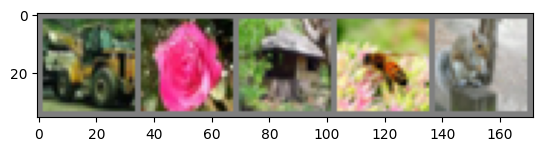

Predicted: ['tractor', 'rose', 'house', 'bee', 'squirrel']
Actual: ['mountain', 'forest', 'seal', 'mushroom', 'sea']


In [14]:
dataiter = iter(testloader)
image,labels = next(dataiter)

outputs = model(images.to(device))
_,predicted = torch.max(outputs,1)

# 显示前5张图像
imshow(torchvision.utils.make_grid(images[:5]))
print('Predicted:',[classes[predicted[j]] for j in range(5)])
print('Actual:',[classes[labels[j]] for j in range(5)])